## Importation 

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import ast
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords


In [44]:
file_movie = 'data/movie.metadata.tsv'
movie_metadata_df = pd.read_csv(file_movie, sep='\t', header=None)


In [45]:
movie_metadata_df.columns = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages',
    'Movie countries',
    'Movie genres'
]

In [46]:

movie_metadata_df.head()

Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0   

                      Movie languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                             Movie countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                        Movie genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [47]:
len(movie_metadata_df)

81741

In [48]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


Text(0.5, 1.0, 'Number of NaN Values per Column')

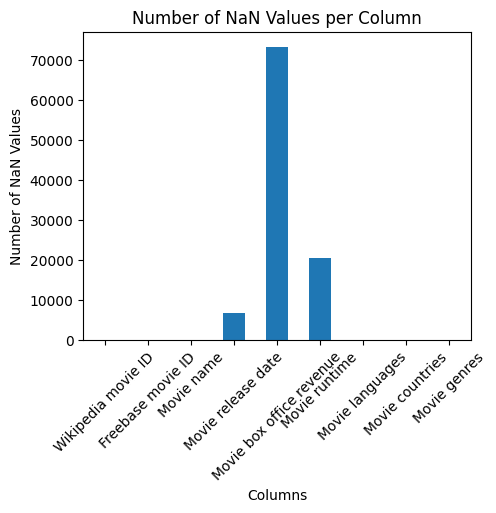

In [49]:
# Calculate the number of NaN values in each column
na_counts = movie_metadata_df.isna().sum()

# Plotting the NaN counts as a bar chart
plt.figure(figsize=(5, 4))
na_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.ylabel('Number of NaN Values')
plt.title('Number of NaN Values per Column')


In [50]:
missing_BoxOffice = movie_metadata_df['Movie box office revenue'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_Box = (missing_BoxOffice / len(movie_metadata_df)) * 100
missing_percentage_Box.round(2)

89.72

In [51]:
missing_date = movie_metadata_df['Movie release date'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_date = (missing_date / len(movie_metadata_df)) * 100
missing_percentage_date.round(2)

8.44

In [52]:
missing_runtime = movie_metadata_df['Movie runtime'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_runtime = (missing_runtime / len(movie_metadata_df)) * 100
missing_percentage_runtime.round(2)

25.02

A voir si c'est quelque chose qui nous intéresse ou pas

Very few information on Movie box office revenue 

# EDA (PLOT)

In [53]:
metadata_df = movie_metadata_df.copy()

In [54]:
print(metadata_df['Movie genres'].apply(type).value_counts())
print(metadata_df['Movie release date'].apply(type).value_counts())

Movie genres
<class 'str'>    81741
Name: count, dtype: int64
Movie release date
<class 'str'>      74839
<class 'float'>     6902
Name: count, dtype: int64


In [55]:
def convert_to_list(df, column_name):
    #Convert to dictionnary 
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    #Convert to list
    df[column_name] = df[column_name].apply(lambda x: list(x.values()) if isinstance(x, dict) else None)
    return df[column_name]


Convert the columns that look like dictionnary in lists

In [56]:
metadata_df['Movie genres'] = convert_to_list(metadata_df, 'Movie genres')
metadata_df['Movie languages'] = convert_to_list(metadata_df, 'Movie languages')
metadata_df['Movie countries'] = convert_to_list(metadata_df, 'Movie countries')

J'ai regarder la date en ligne il y a une typo c'est en 2010 pas 1010 jsp si c'est mieux de l'enelver ou changer la date (ici je l'ai changé) 

In [57]:
release_date = metadata_df .iloc[62836]['Movie release date']
release_date

'1010-12-02'

In [58]:
wikipedia_id = metadata_df .iloc[62836]['Wikipedia movie ID']
wikipedia_id

29666067

In [59]:
metadata_df .at[62836, 'Movie release date'] = "2010-12-02"

# Verify the change
print("Updated Release Date at position 62836:", metadata_df .at[62836, 'Movie release date'])

Updated Release Date at position 62836: 2010-12-02


In [60]:
metadata_df['Movie release date'] = pd.to_datetime(metadata_df['Movie release date'], errors='coerce')
metadata_df['Movie release date'] = pd.to_datetime(metadata_df['Movie release date']).dt.year.astype('Int64')

In [61]:
metadata_df.head()

Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name  Movie release date  \
0                                     Ghosts of Mars                2001   
1  Getting Away with Murder: The JonBenét Ramsey ...                2000   
2                                        Brun bitter                <NA>   
3                                   White Of The Eye                <NA>   
4                                  A Woman in Flames                <NA>   

   Movie box office revenue  Movie runtime       Movie languages  \
0                14010832.0           98.0    [English Language]   
1                       NaN           95.0    [English Language]   
2                       NaN           83.0  [Norwegian Language]   
3                       NaN          110.0    [English Language]   
4                       NaN          106.0     [German Language]   

              Movie countries  \
0  [United States of America]   
1  [United States of America]   
2                    [Norway]   
3            [United Kingdom]   
4                   [Germany]   

                                        Movie genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery, Biographical film, Drama, Crime Drama]  
2                             [Crime Fiction, Drama]  
3  [Thriller, Erotic thriller, Psychological thri...  
4                                            [Drama]

In [62]:
#Remove the years that are NaN as we are intereseted in date
print(metadata_df['Movie release date'].isna().value_counts())
metadata_df = metadata_df.dropna(subset=['Movie release date'])
metadata_df['Movie release date'].isna().value_counts()

Movie release date
True     42368
False    39373
Name: count, dtype: int64


Movie release date
False    39373
Name: count, dtype: int64

## Movie Languages

In [63]:
all_languages = metadata_df['Movie languages'].explode()

language_counts = all_languages.value_counts()

print(language_counts)

Movie languages
English Language          23802
Silent film                2250
French Language            1895
Hindi Language             1620
Japanese Language          1330
                          ...  
Picard Language               1
Krio Language                 1
Egyptian, Ancient             1
Chhattisgarhi Language        1
Hausa Language                1
Name: count, Length: 192, dtype: int64


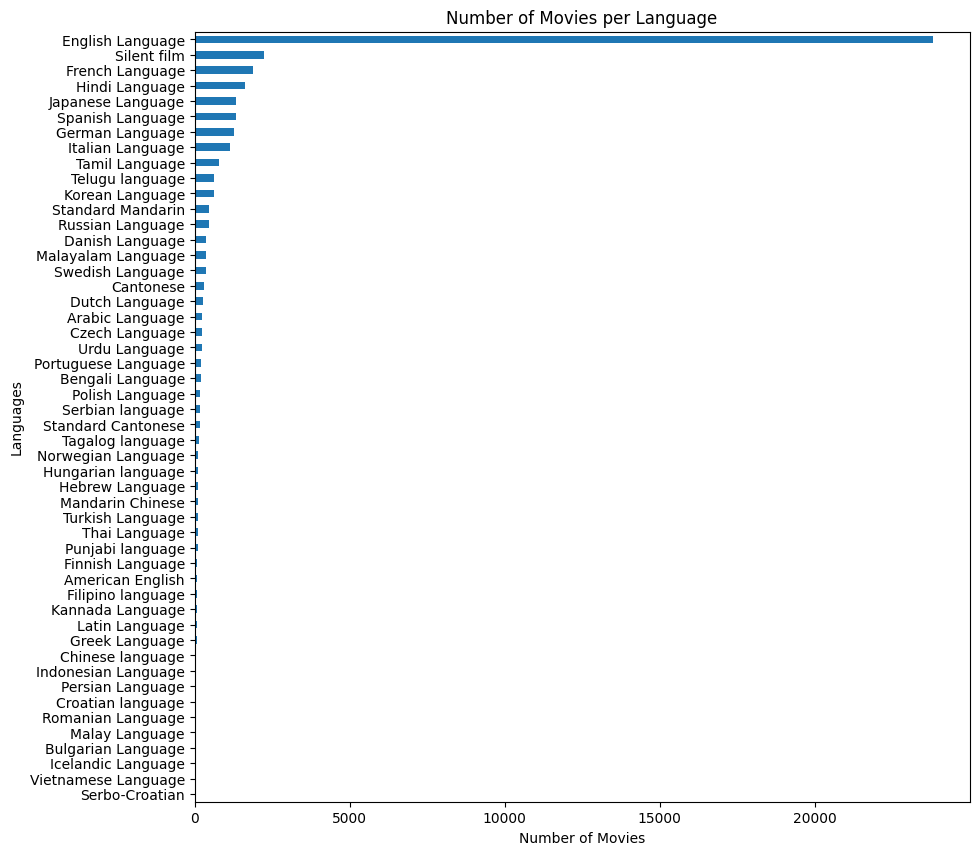

In [64]:
plt.figure(figsize=(10, 10))  
language_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Languages')
plt.title('Number of Movies per Language')

plt.show()

clearly most of the movies are in english 

In [65]:
# I don't know if we should cut off language that appear below a certain number 
small_occurrence_count = (language_counts < 100).sum()
small_occurrence_count

159

## Movie Genres 

In [66]:
all_genres = metadata_df['Movie genres'].explode()

genres_counts = all_genres.value_counts()

Text(0.5, 1.0, 'Number of Movies per Genre')

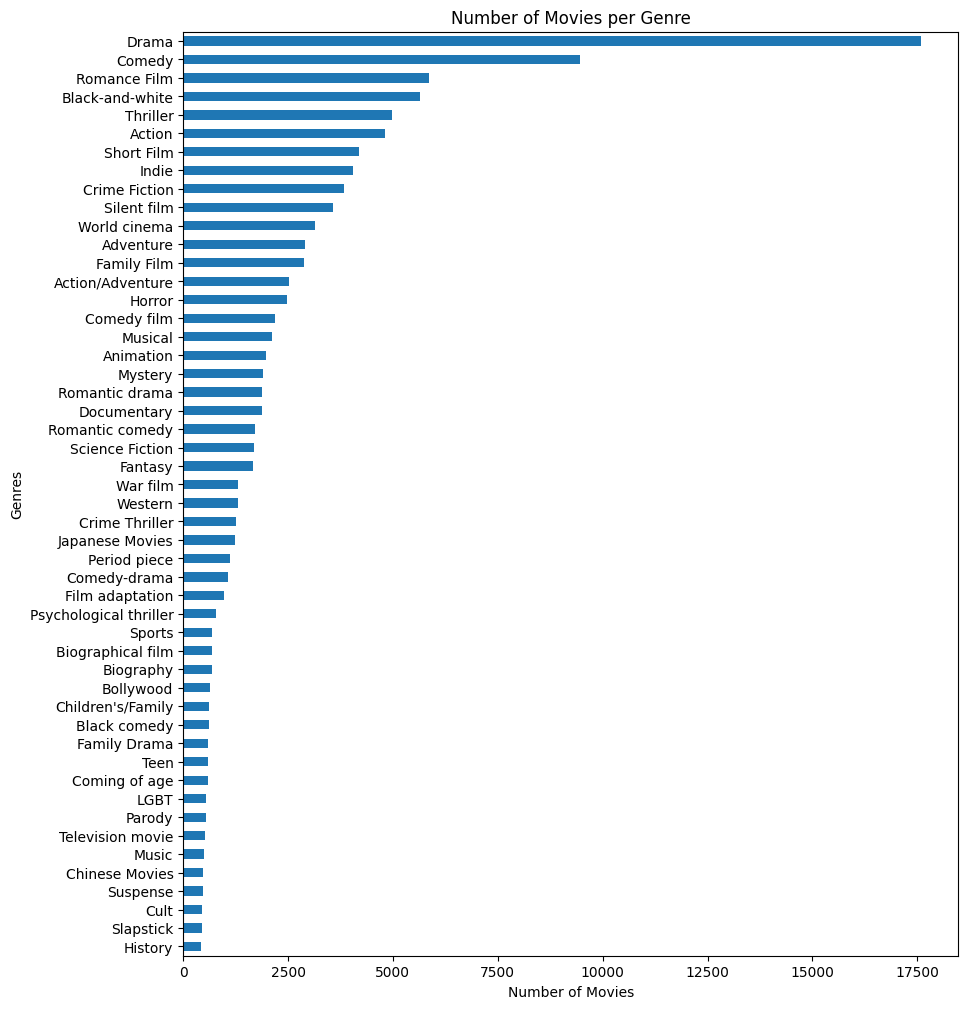

In [67]:
plt.figure(figsize=(10, 12))  
genres_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Number of Movies per Genre')

## Movie Countries

In [68]:
all_countries = metadata_df['Movie countries'].explode()

countries_counts = all_countries.value_counts()

In [69]:
countries_counts


Movie countries
United States of America    20623
United Kingdom               3352
India                        3298
France                       2295
Japan                        1504
                            ...  
Qatar                           1
Macau                           1
German Language                 1
Uzbek SSR                       1
Haiti                           1
Name: count, Length: 137, dtype: int64

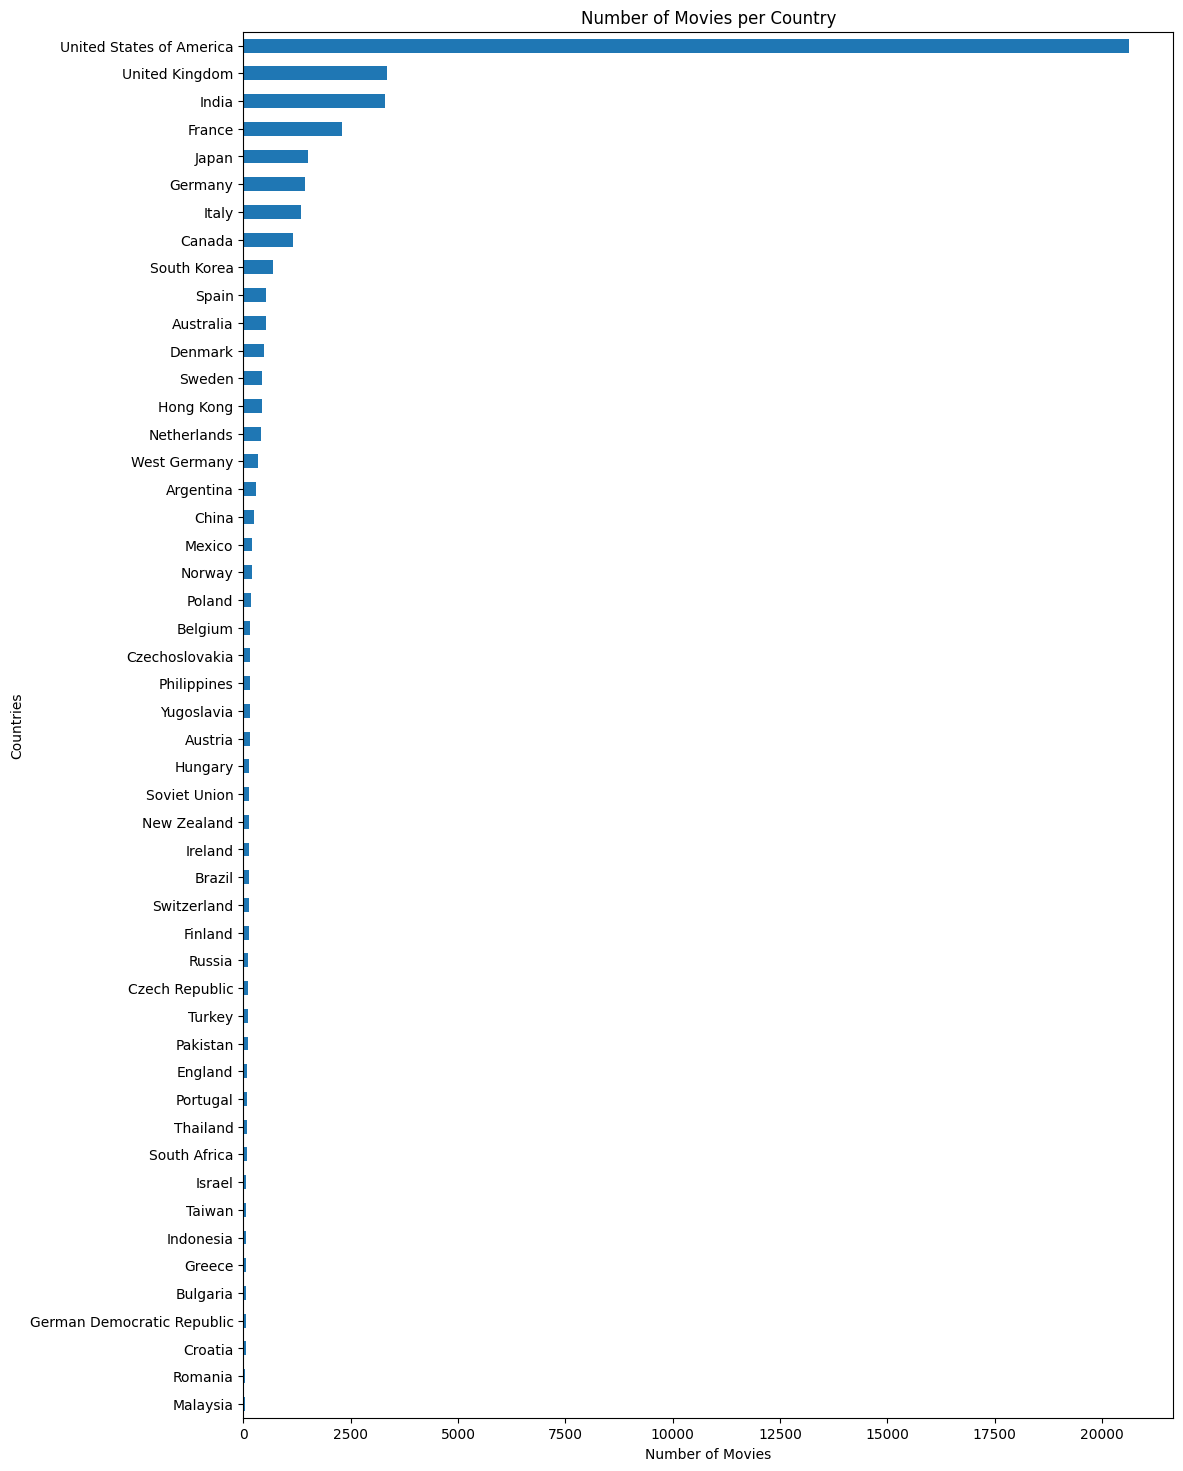

In [70]:
plt.figure(figsize=(12, 18))  
countries_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')
plt.title('Number of Movies per Country')
plt.show()

## Movie Release Year

In [71]:
all_years = metadata_df['Movie release date'].explode()

years_counts = all_years.value_counts()

In [72]:
metadata_df['Movie release date'].max()

2016

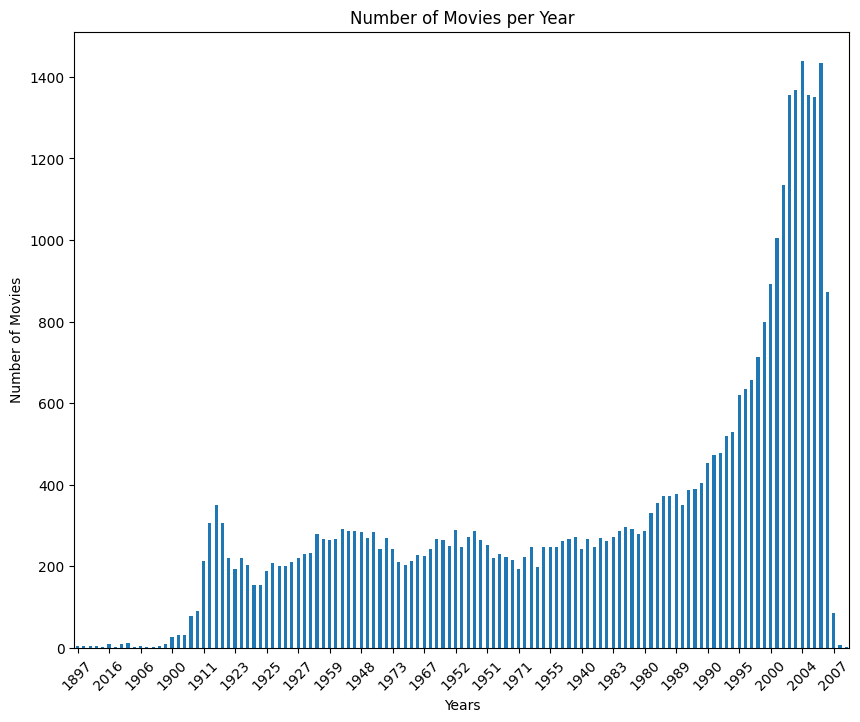

In [73]:
plt.figure(figsize=(10, 8))  
plot_years_counts = all_years.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
years_label =  all_years.value_counts().sort_values(ascending=True).index
plt.xticks(range(0, len(years_label), 5), years_label[::5], rotation=45)
plt.show()

## Movie per year for top countries 

In [74]:
# Get top 10 countries releasing movies
top_10_countries = countries_counts.head(10).index

# Get one country per row
expanded_df = metadata_df.explode('Movie countries')

# the top 10
top_countries_df = expanded_df[expanded_df['Movie countries'].isin(top_10_countries)]
top_countries_df.head()

Wikipedia movie ID Freebase movie ID  \
0               975900         /m/03vyhn   
1              3196793         /m/08yl5d   
5             13696889        /m/03cfc81   
7             10408933        /m/02qc0j7   
12             6631279         /m/0gffwj   

                                           Movie name  Movie release date  \
0                                      Ghosts of Mars                2001   
1   Getting Away with Murder: The JonBenét Ramsey ...                2000   
5                                       The Gangsters                1913   
7                            Alexander's Ragtime Band                1938   
12                                        Little city                1997   

    Movie box office revenue  Movie runtime                  Movie languages  \
0                 14010832.0           98.0               [English Language]   
1                        NaN           95.0               [English Language]   
5                        NaN           35.0  [Silent film, English Language]   
7                  3600000.0          106.0               [English Language]   
12                       NaN           93.0               [English Language]   

             Movie countries  \
0   United States of America   
1   United States of America   
5   United States of America   
7   United States of America   
12  United States of America   

                                         Movie genres  
0   [Thriller, Science Fiction, Horror, Adventure,...  
1    [Mystery, Biographical film, Drama, Crime Drama]  
5   [Short Film, Silent film, Indie, Black-and-whi...  
7                  [Musical, Comedy, Black-and-white]  
12  [Romantic comedy, Ensemble Film, Comedy-drama,...

In [75]:
# Count movies per year for each country
movies_per_year_countries = top_countries_df.groupby(['Movie countries', 'Movie release date']).size().unstack(fill_value=0)
movies_per_year_countries.head()

Movie release date  1892  1894  1895  1896  1898  1899  1900  1901  1902  \
Movie countries                                                            
Canada                 0     0     0     0     0     0     0     0     0   
France                 3     0     1     1     0     1     2     0     1   
Germany                0     0     3     0     0     0     0     0     0   
India                  0     0     0     0     0     0     0     0     0   
Italy                  0     0     0     0     0     0     0     0     0   

Movie release date  1903  ...  2006  2007  2008  2009  2010  2011  2012  2013  \
Movie countries           ...                                                   
Canada                 0  ...    92    79    74    92    68    62    20     3   
France                 3  ...    66    60    65    95    99    79    45     7   
Germany                0  ...    64    48    66    70    44    55    30     1   
India                  0  ...   146   211   287   201   192   144   213    10   
Italy                  0  ...    18    20    22    24    22    19    12     1   

Movie release date  2014  2016  
Movie countries                 
Canada                 0     0  
France                 0     0  
Germany                0     0  
India                  2     0  
Italy                  0     0  

[5 rows x 122 columns]

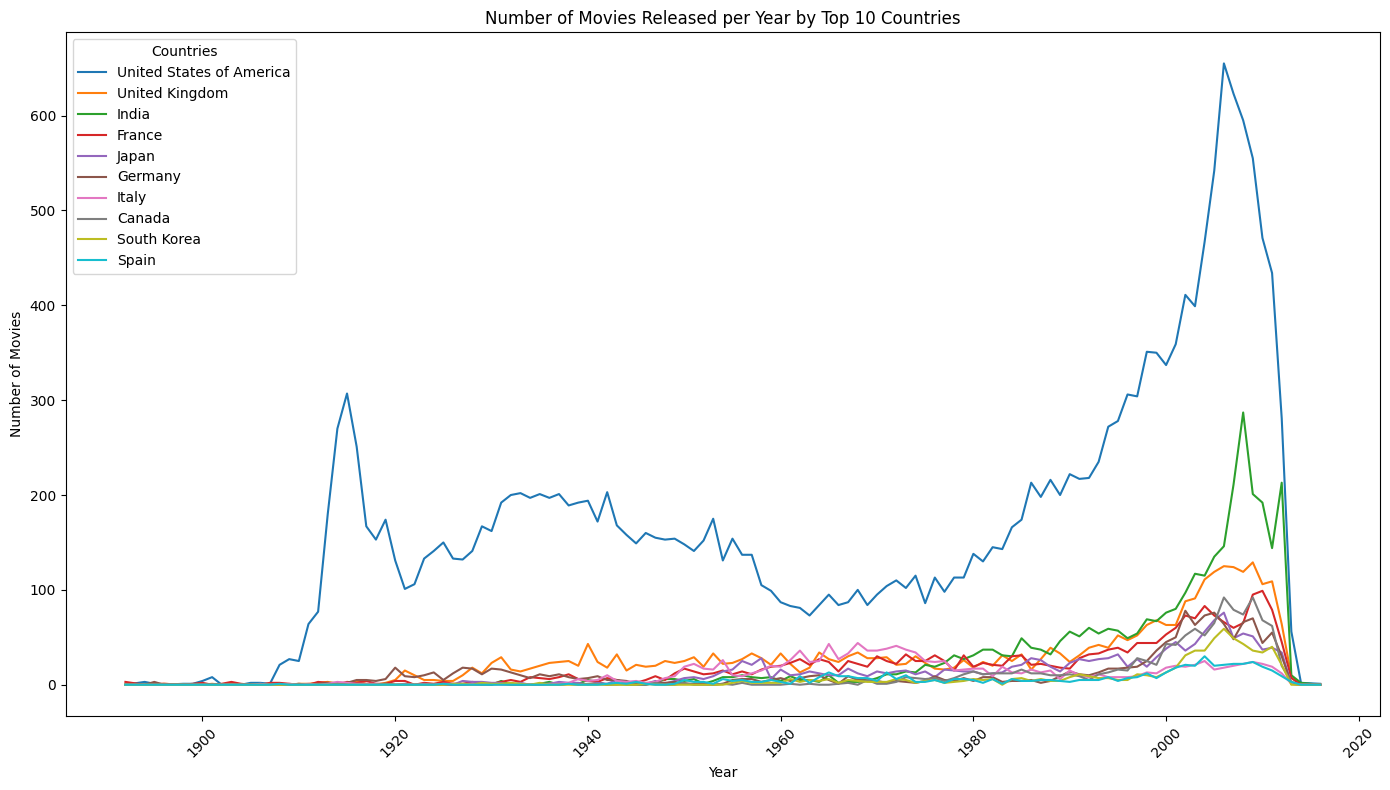

In [76]:
plt.figure(figsize=(14, 8))

# Plot a line for each top country
for country in top_10_countries:
    if country in movies_per_year_countries.index:  
        plt.plot(movies_per_year_countries.columns, movies_per_year_countries.loc[country], label=country)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year by Top 10 Countries')
plt.legend(title='Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# Group by decade by summing every 10 years
movies_per_decade = movies_per_year_countries.groupby((movies_per_year_countries.columns // 10) * 10, axis=1).sum()
movies_per_decade

/var/folders/c3/lx552p8n5hn_0p4zwmkvswr80000gn/T/ipykernel_2612/1893053982.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  movies_per_decade = movies_per_year_countries.groupby((movies_per_year_countries.columns // 10) * 10, axis=1).sum()


Movie release date        1890  1900  1910  1920  1930  1940  1950  1960  \
Movie countries                                                            
Canada                       0     0     2     0     2     5     5    10   
France                       6    12    16    21    58    54   140   222   
Germany                      3     0    28   121   108    40    29    63   
India                        0     0     2     3    10    23    64    48   
Italy                        0     2    10     3    12    51   166   313   
Japan                        0     0     0    12    15    23   140   121   
South Korea                  0     0     0     4     7     1    12    40   
Spain                        0     1     0     1     1     9    38    68   
United Kingdom               1     1    16    88   211   240   260   263   
United States of America     6    65  1668  1335  1933  1666  1379   858   

Movie release date        1970  1980  1990  2000  2010  
Movie countries                                         
Canada                      55   121   154   650   153  
France                     261   225   352   698   230  
Germany                     44    51   180   633   130  
India                      177   369   576  1465   561  
Italy                      291   137   102   203    54  
Japan                      133   177   256   516   111  
South Korea                 37    48    81   370    95  
Spain                       58    42    64   211    46  
United Kingdom             230   265   457  1032   288  
United States of America  1049  1723  2753  4943  1245

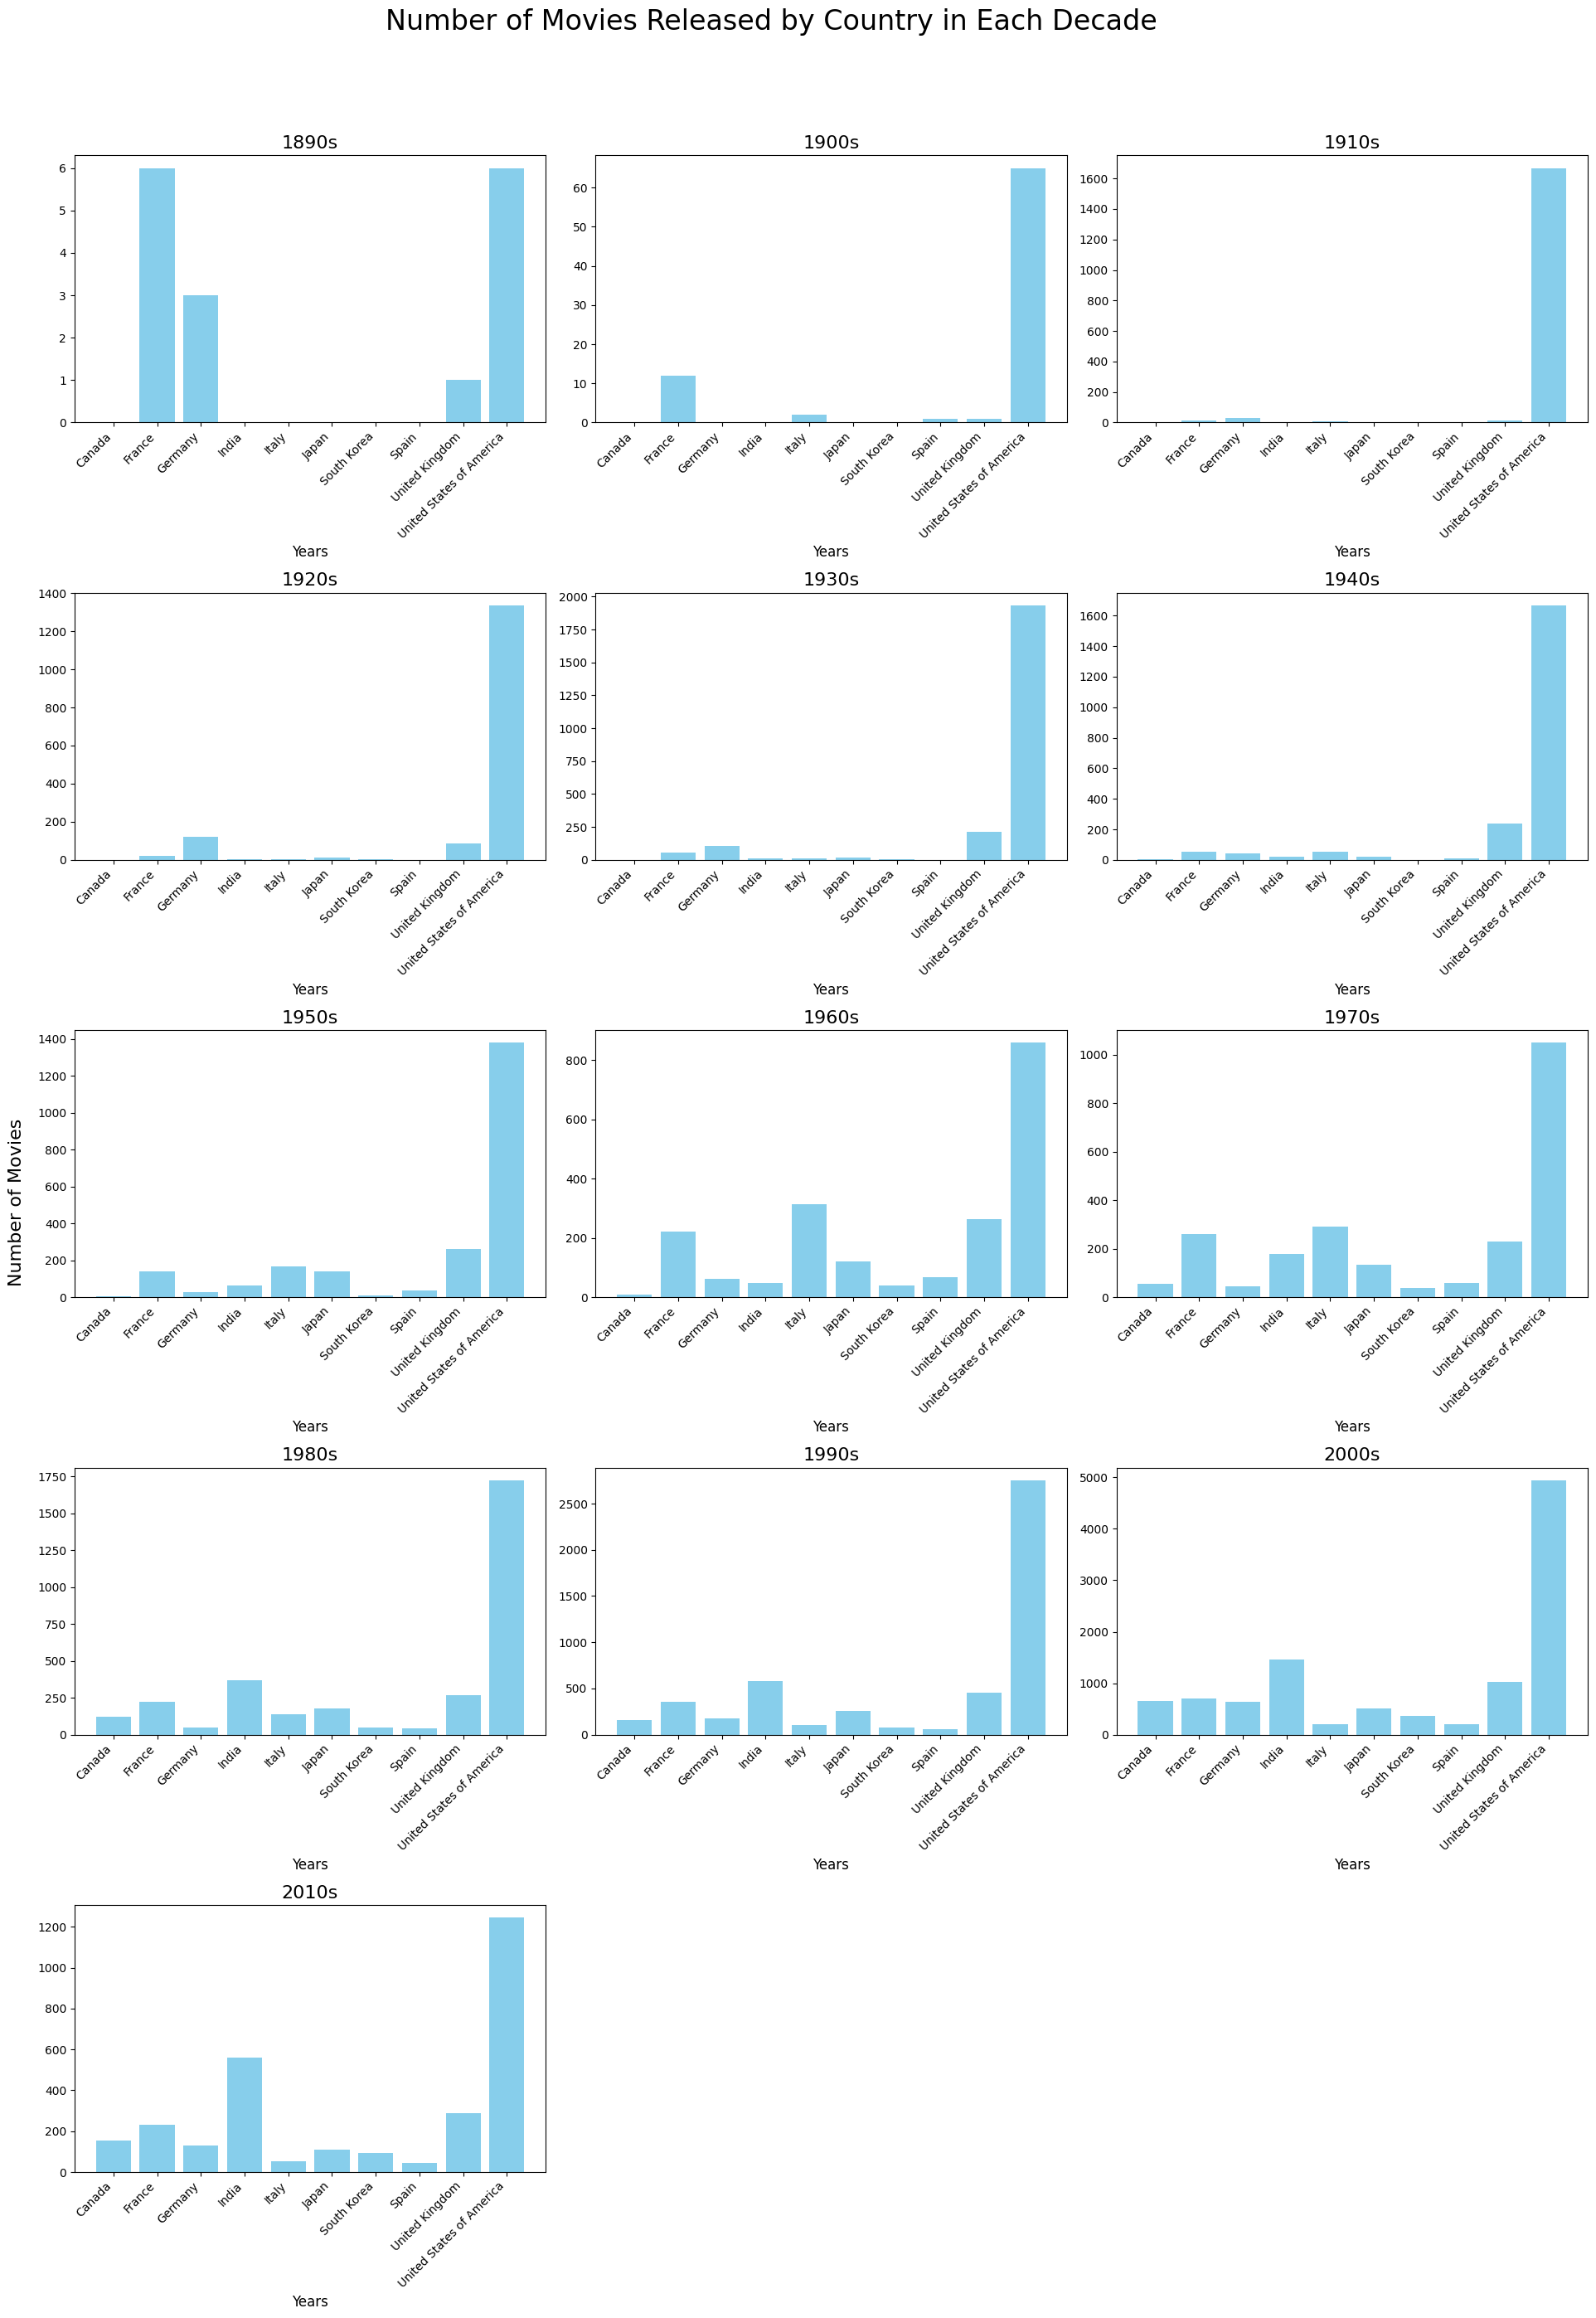

In [78]:
movies_per_decade_by_country = movies_per_decade.T

num_decades = len(movies_per_decade_by_country.index)
rows = 5
cols = 3  

fig, axes = plt.subplots(rows, cols, figsize=(20, 30), sharey=False)
fig.suptitle('Number of Movies Released by Country in Each Decade', fontsize=24)
axes = axes.flatten()

# Plot each decade’s genre distribution in its own subplot
for i, decade in enumerate(movies_per_decade_by_country.index):
    ax = axes[i]  # Get the current subplot
    ax.bar(movies_per_decade_by_country.columns, movies_per_decade_by_country.loc[decade], color='skyblue', width=0.8)
    ax.set_title(f"{decade}s", fontsize=16)
    ax.set_xlabel('Years', fontsize=12)
    ax.set_xticks(range(len(movies_per_decade_by_country.columns)))
    ax.set_xticklabels(movies_per_decade_by_country.columns, rotation=45, fontsize=10, ha='right')
# Hide any unused subplots if there are fewer decades than grid spots
for j in range(num_decades, len(axes)):
    axes[j].set_visible(False)

fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  
plt.show()


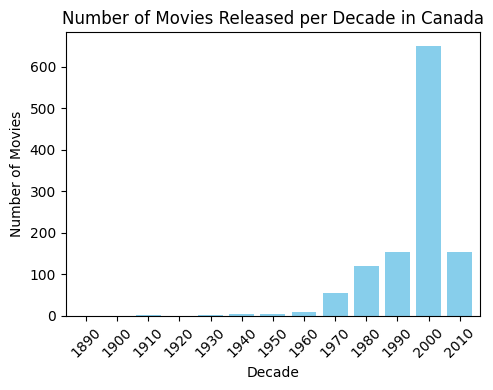

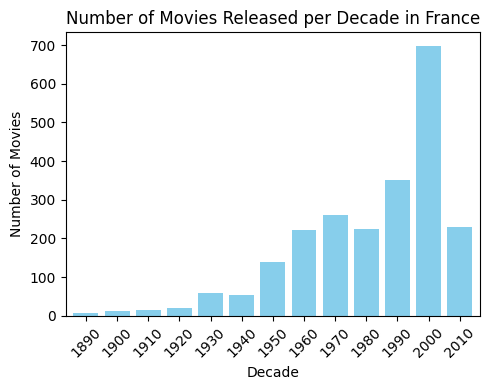

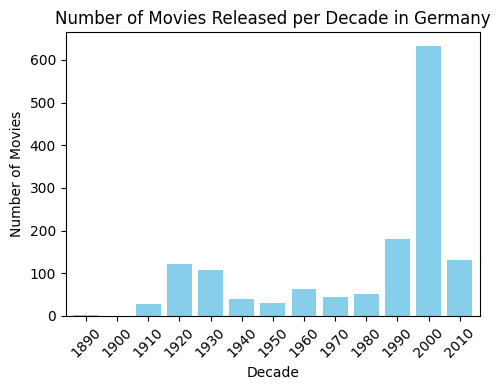

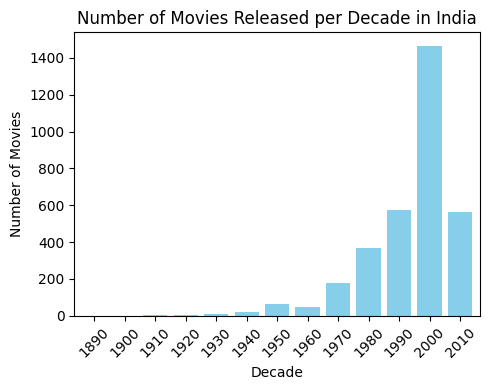

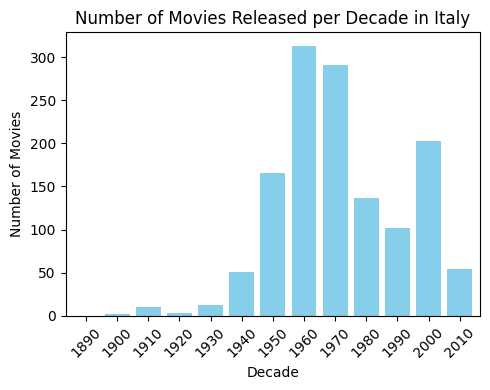

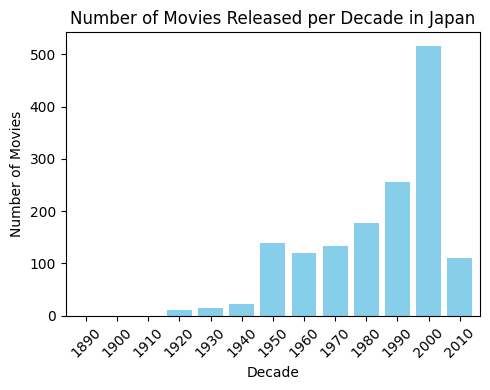

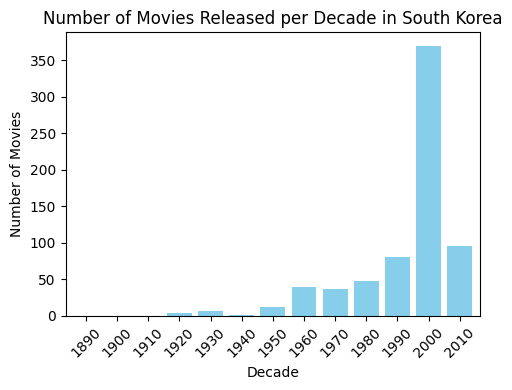

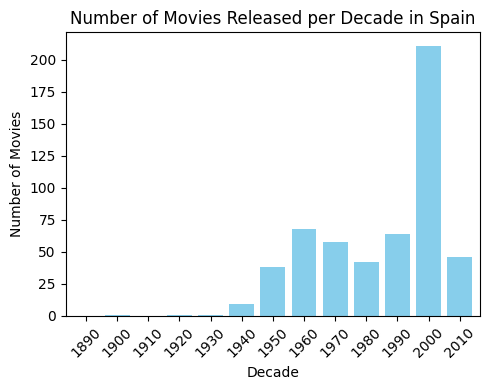

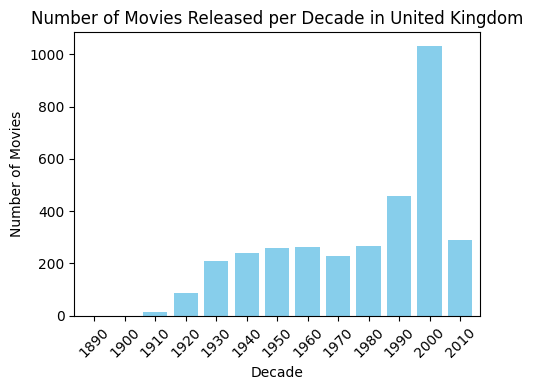

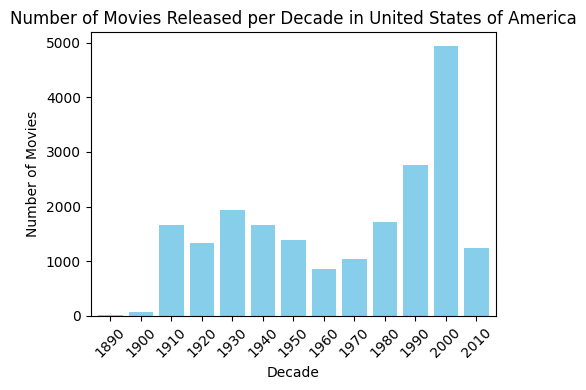

In [79]:
# Plot a bar chart for each country
for country in movies_per_decade.index:
    plt.figure(figsize=(5, 4))
    movies_per_decade.loc[country].plot(kind='bar', color='skyblue', width=0.8)

    # Customize each plot
    plt.xlabel('Decade')
    plt.ylabel('Number of Movies')
    plt.title(f'Number of Movies Released per Decade in {country}')
    plt.xticks(rotation=45)
    
    # Show each plot separately
    plt.tight_layout()
    plt.show()

## Movie per year for top genre

In [80]:
# Get top 10 countries releasing movies
top_20_genres = genres_counts.head(20).index

# Get one country per row
expanded_df_genre = metadata_df.explode('Movie genres')

# the top 10
top_genres_df = expanded_df_genre[expanded_df_genre['Movie genres'].isin(top_20_genres)]

movies_per_year_genres = top_genres_df.groupby(['Movie genres', 'Movie release date']).size().unstack(fill_value=0)
movies_per_decade_genres = movies_per_year_genres.groupby((movies_per_year_genres.columns // 10) * 10, axis=1).sum()


/var/folders/c3/lx552p8n5hn_0p4zwmkvswr80000gn/T/ipykernel_2612/1866896123.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  movies_per_decade_genres = movies_per_year_genres.groupby((movies_per_year_genres.columns // 10) * 10, axis=1).sum()


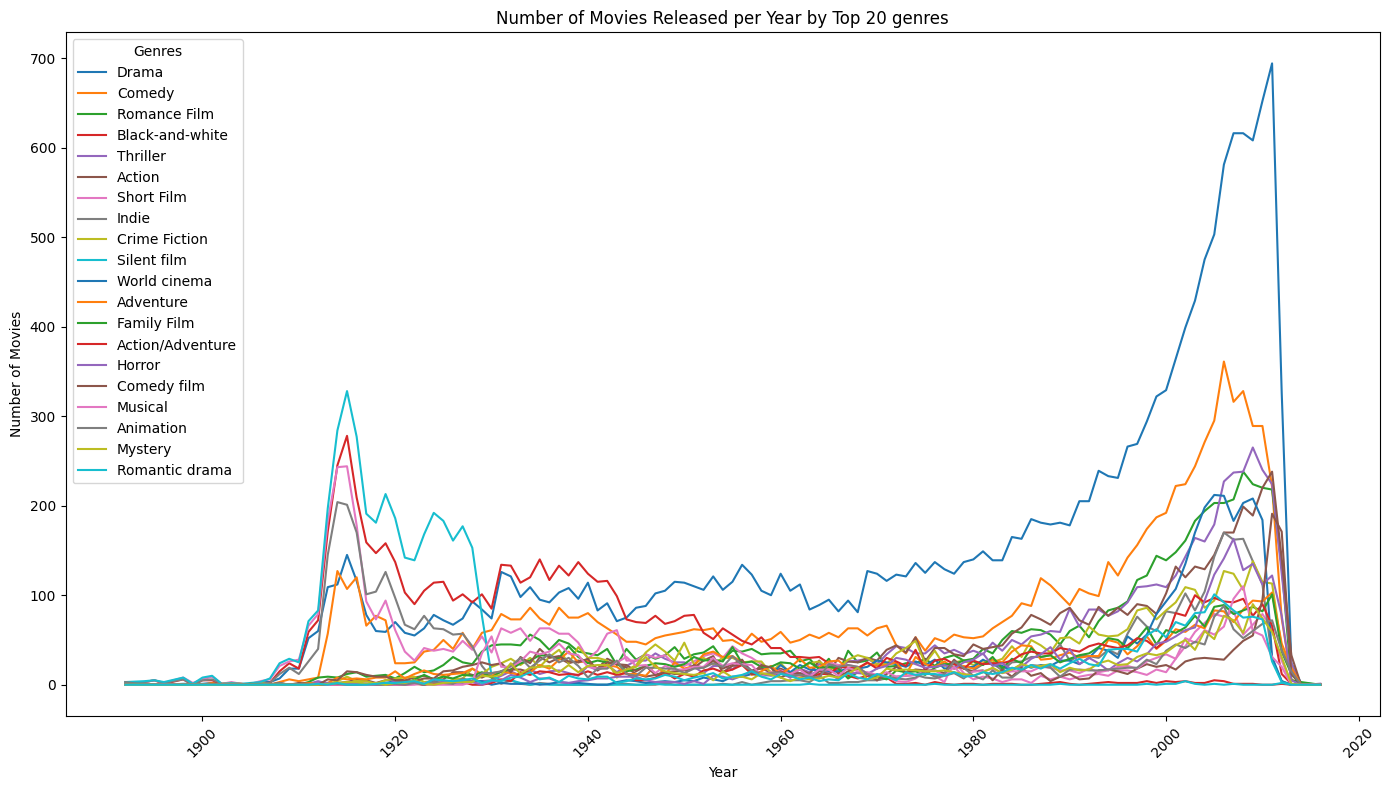

In [81]:
plt.figure(figsize=(14, 8))

# Plot a line for each top country
for genre in top_20_genres:
    if genre in movies_per_year_genres.index:  
        plt.plot(movies_per_year_genres.columns, movies_per_year_genres.loc[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year by Top 20 genres')
plt.legend(title='Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

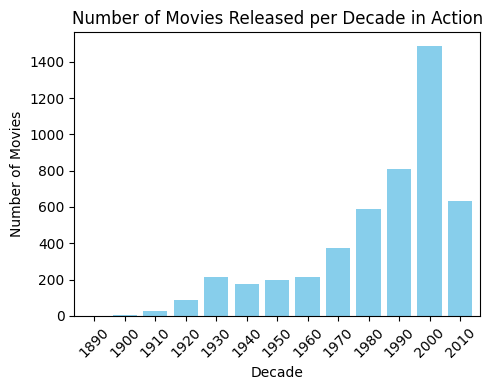

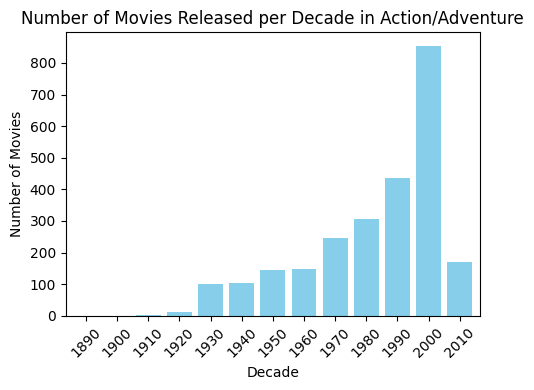

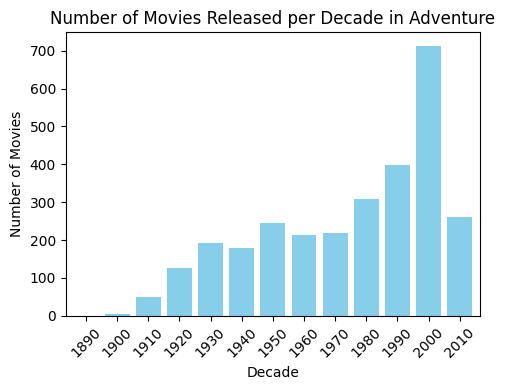

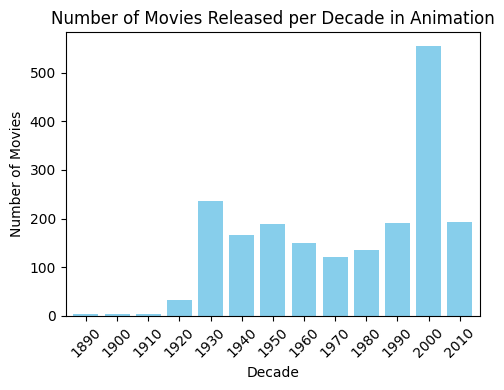

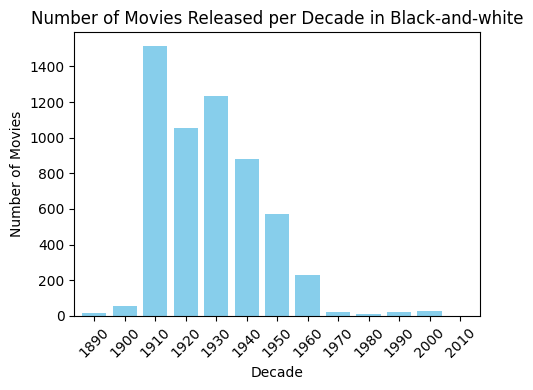

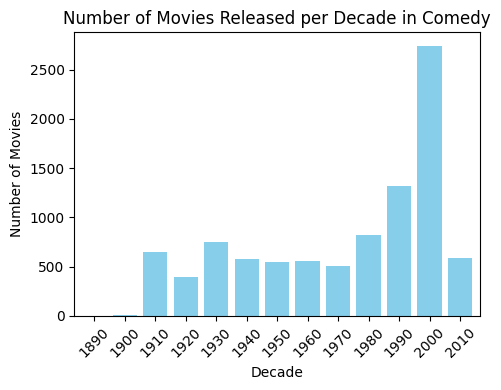

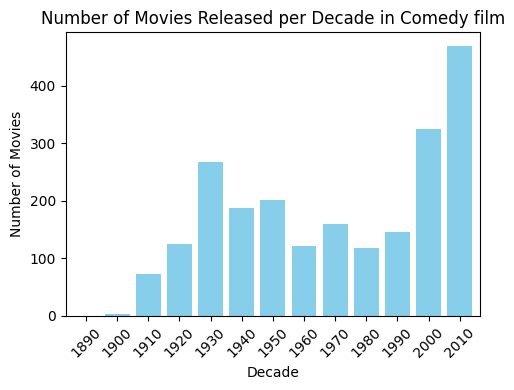

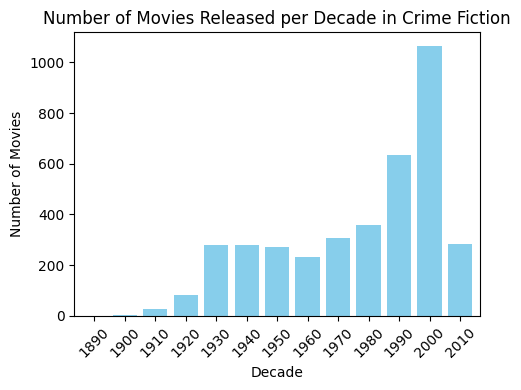

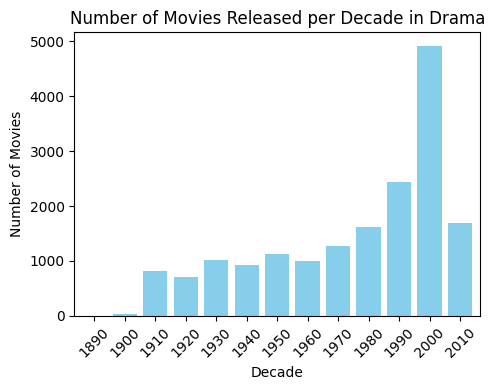

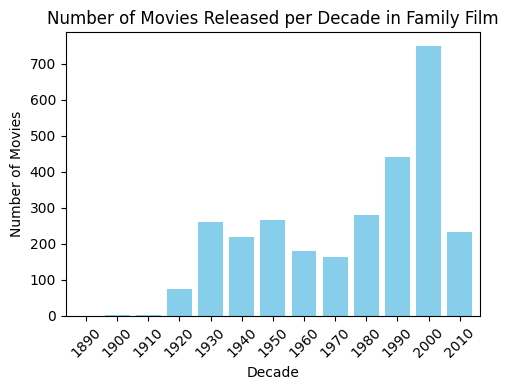

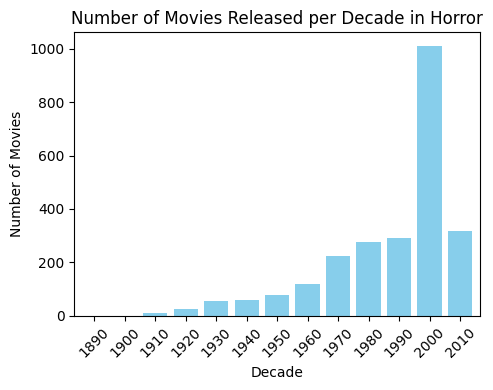

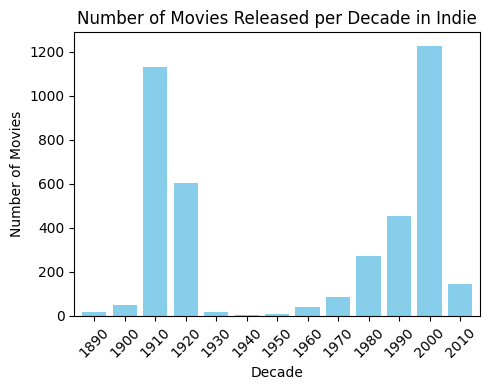

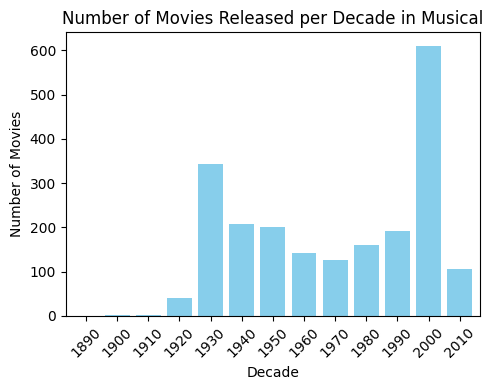

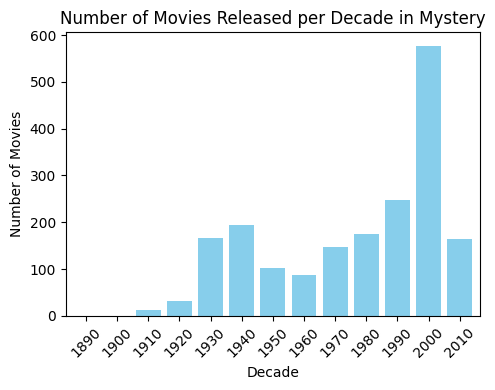

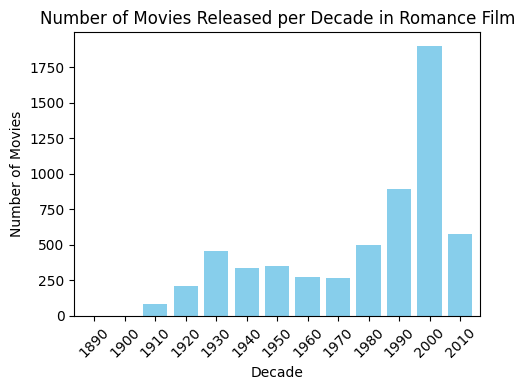

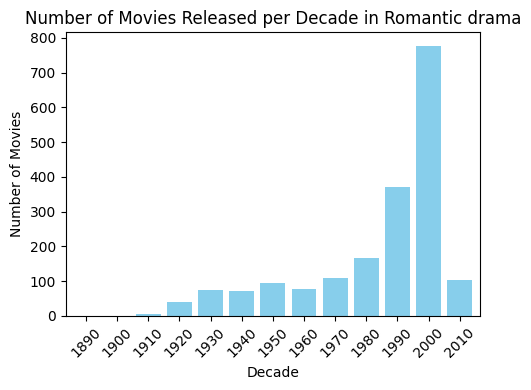

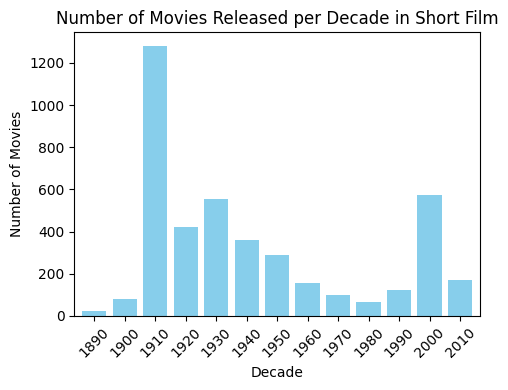

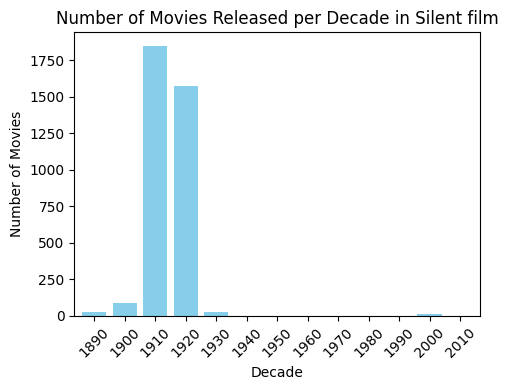

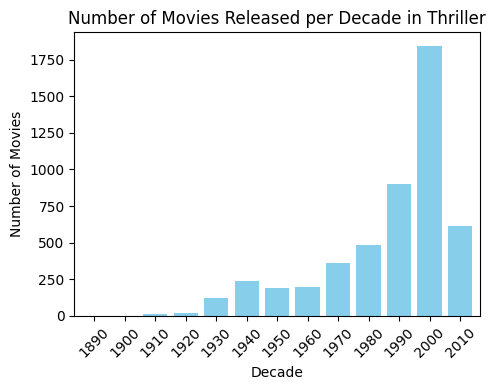

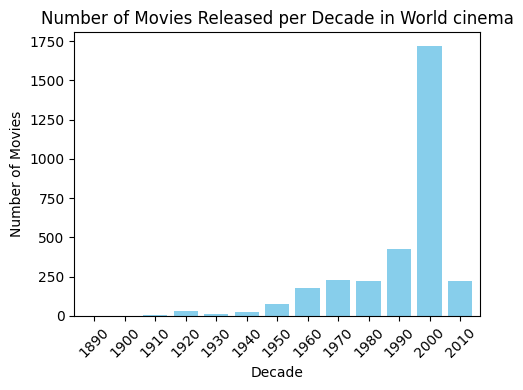

In [82]:
# Plot a bar chart for each country
for genre in movies_per_decade_genres.index:
    plt.figure(figsize=(5, 4))
    movies_per_decade_genres.loc[genre].plot(kind='bar', color='skyblue', width=0.8)

    # Customize each plot
    plt.xlabel('Decade')
    plt.ylabel('Number of Movies')
    plt.title(f'Number of Movies Released per Decade in {genre}')
    plt.xticks(rotation=45)
    
    # Show each plot separately
    plt.tight_layout()
    plt.show()

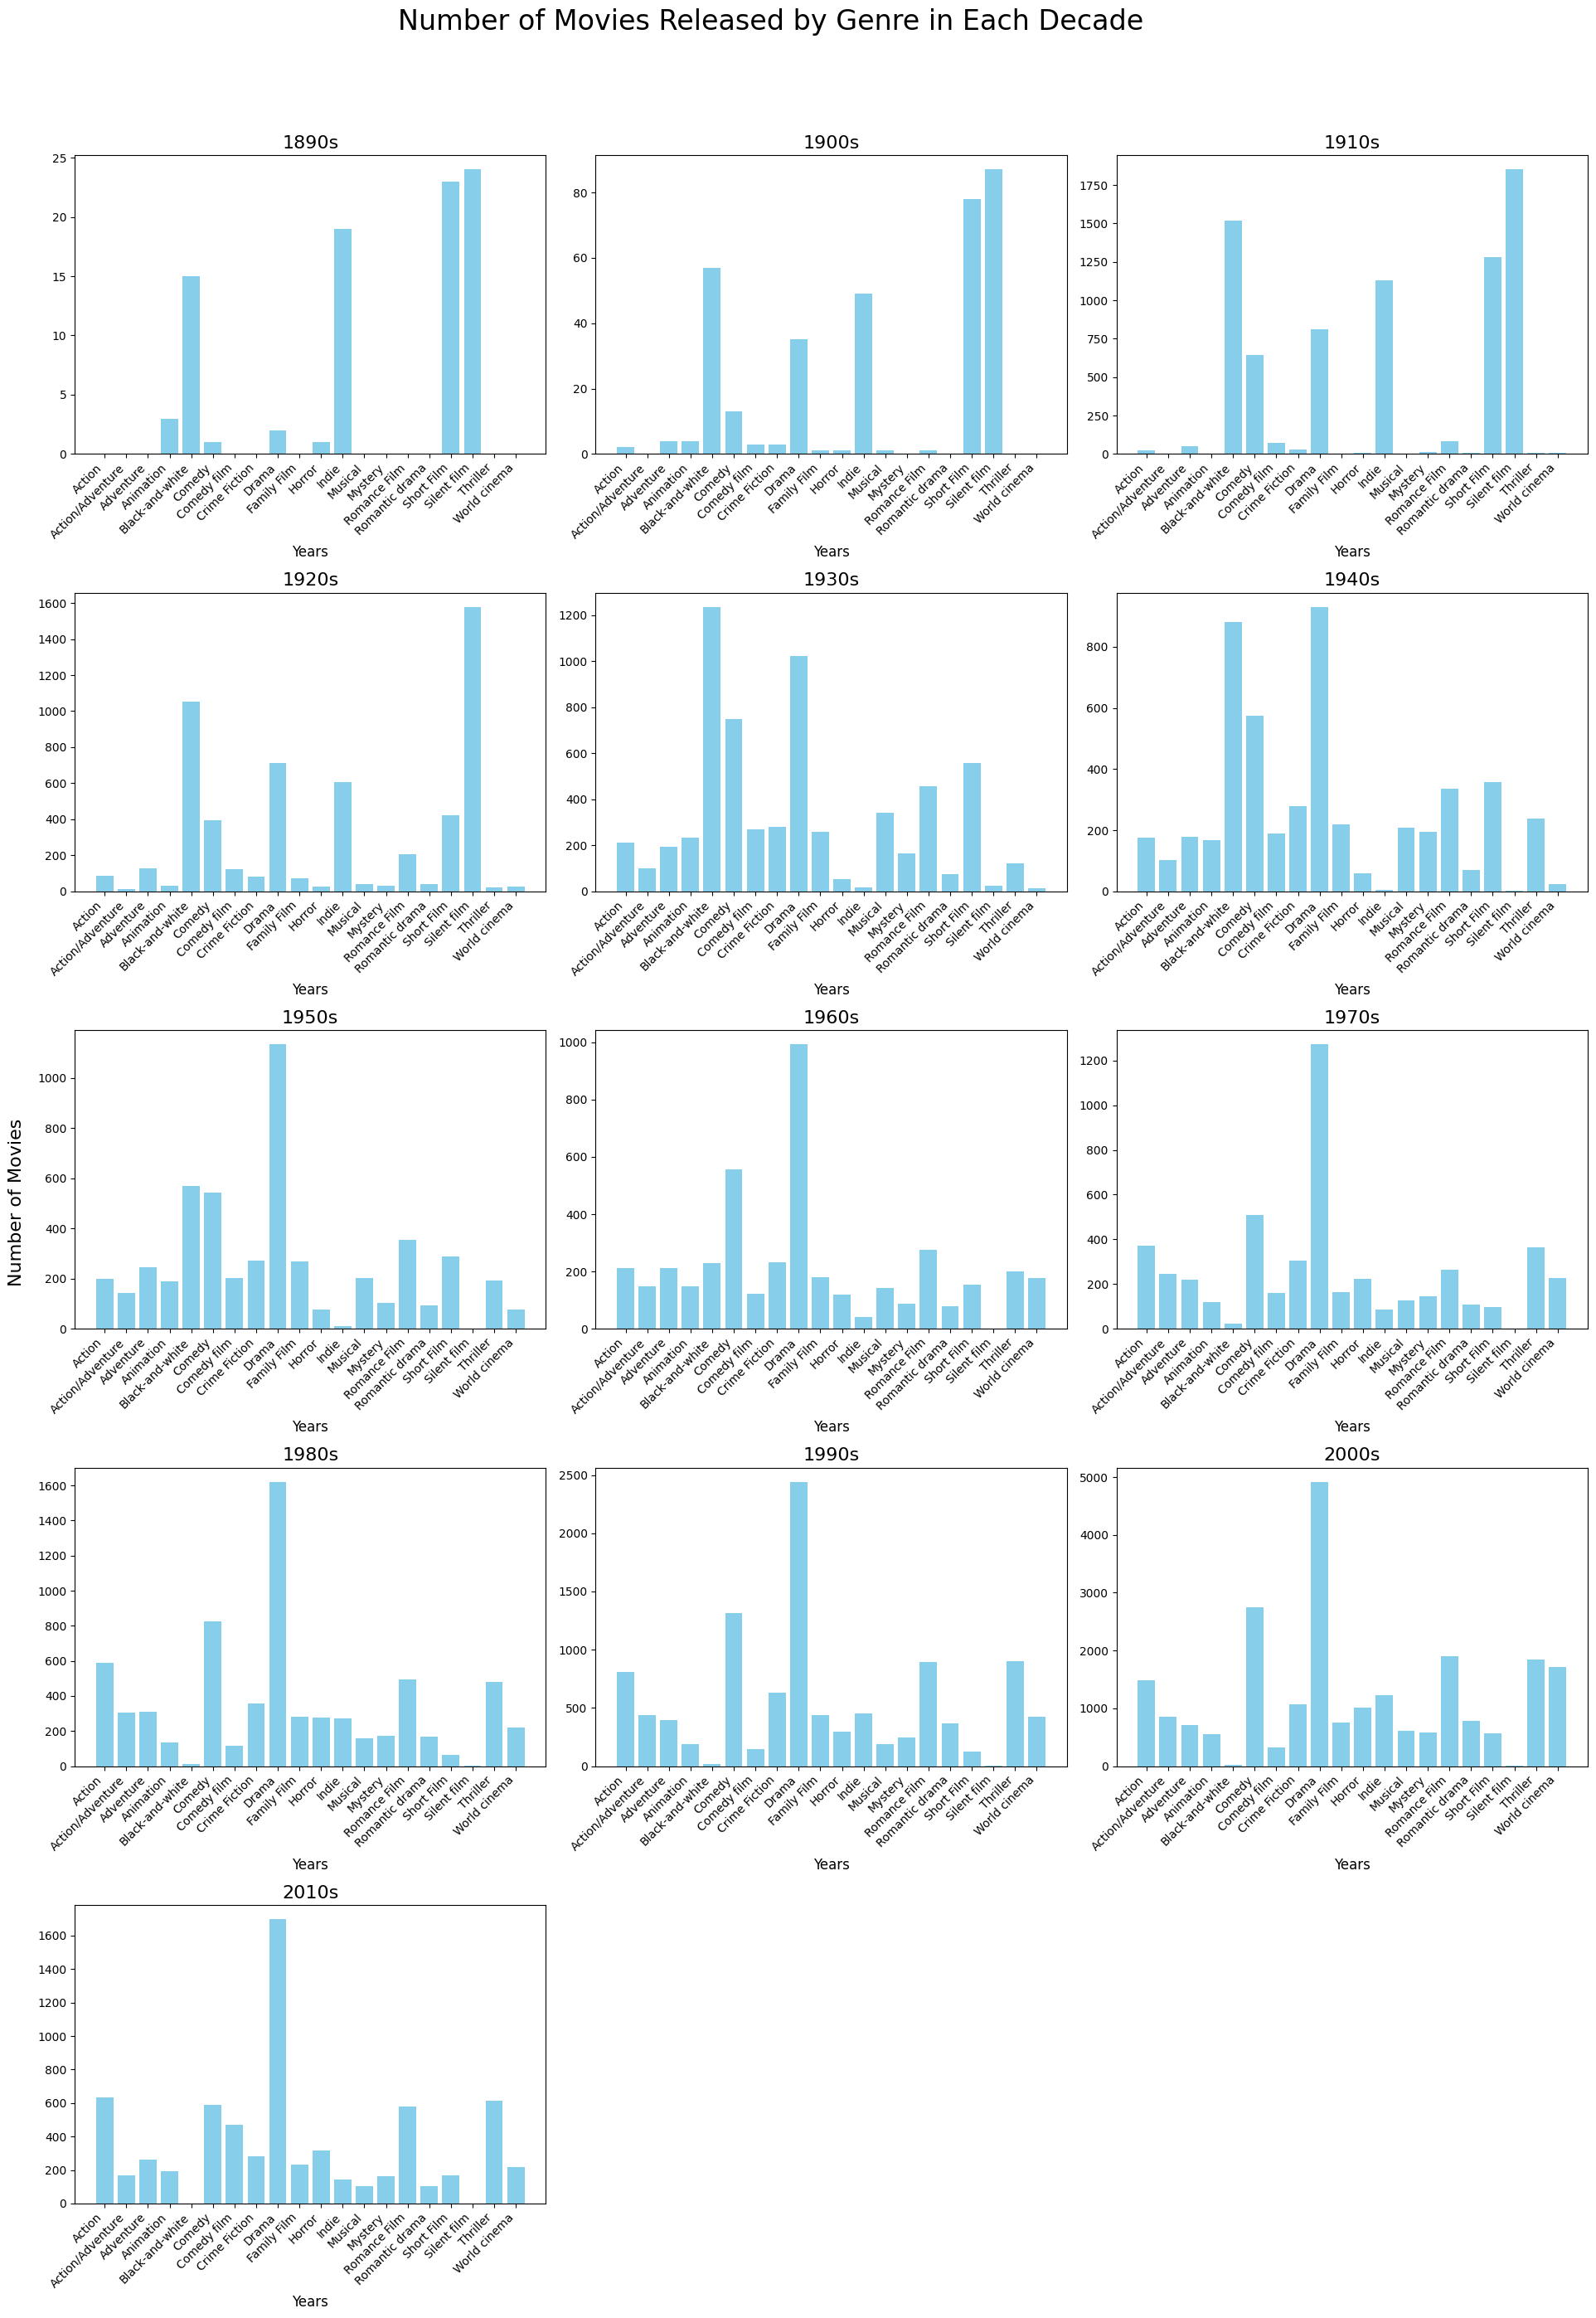

In [83]:
movies_per_decade_by_genre = movies_per_decade_genres.T

num_decades = len(movies_per_decade_by_genre.index)
rows = 5
cols = 3  

fig, axes = plt.subplots(rows, cols, figsize=(20, 30), sharey=False)
fig.suptitle('Number of Movies Released by Genre in Each Decade', fontsize=24)
axes = axes.flatten()

# Plot each decade’s genre distribution in its own subplot
for i, decade in enumerate(movies_per_decade_by_genre.index):
    ax = axes[i]  # Get the current subplot
    ax.bar(movies_per_decade_by_genre.columns, movies_per_decade_by_genre.loc[decade], color='skyblue', width=0.8)
    ax.set_title(f"{decade}s", fontsize=16)
    ax.set_xlabel('Years', fontsize=12)
    ax.set_xticks(range(len(movies_per_decade_by_genre.columns)))
    ax.set_xticklabels(movies_per_decade_by_genre.columns, rotation=45, fontsize=10, ha='right')
# Hide any unused subplots if there are fewer decades than grid spots
for j in range(num_decades, len(axes)):
    axes[j].set_visible(False)

fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  
plt.show()


# Summaries

In [84]:
file_movie = './plot_summaries.txt'
sum_df = pd.read_csv(file_movie, sep='\t', header=None)

FileNotFoundError: [Errno 2] No such file or directory: './plot_summaries.txt'

In [ ]:
sum_df.columns = [
    'Wikipedia movie ID',
    'Plot summary'
]

In [ ]:
sum_df.head()

Wikipedia movie ID                                       Plot summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch...

In [ ]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wikipedia movie ID  42303 non-null  int64 
 1   Plot summary        42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [ ]:
sum_df.isna().sum()

Wikipedia movie ID    0
Plot summary          0
dtype: int64

In [ ]:
# Length of each plot summary
sum_df['summary_length'] = sum_df['Plot summary'].apply(len)

In [ ]:
sum_df['summary_length'].describe()

count    42303.000000
mean      1784.034229
std       1808.925536
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.500000
max      28159.000000
Name: summary_length, dtype: float64

## Word cloud whole summaries

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chloedaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


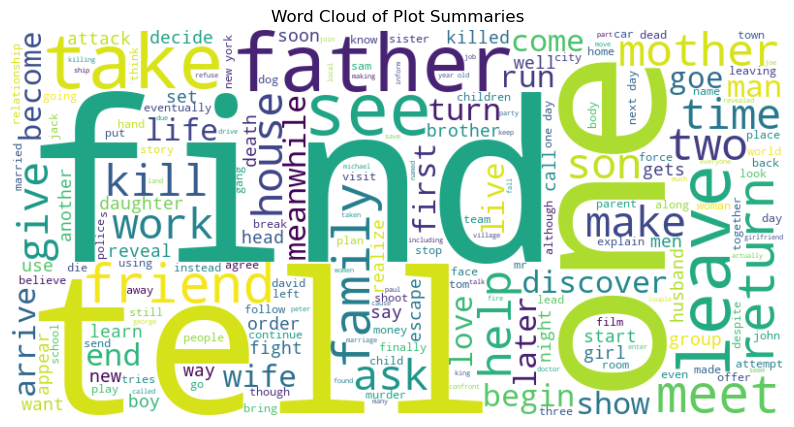

In [ ]:
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Join all plot summaries into a single string and tokenize
all_text = ' '.join(sum_df['Plot summary'])
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plot Summaries')
plt.show()


In [ ]:
genre_df = metadata_df[['Wikipedia movie ID', 'Movie genres']]

# Merge plot summaries with genres based on the Wikipedia movie ID
merged_df = pd.merge(sum_df, genre_df, on='Wikipedia movie ID', how='left')

merged_df.head()

Wikipedia movie ID                                       Plot summary  \
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...   
1            31186339  The nation of Panem consists of a wealthy Capi...   
2            20663735  Poovalli Induchoodan  is sentenced for six yea...   
3             2231378  The Lemon Drop Kid , a New York City swindler,...   
4              595909  Seventh-day Adventist Church pastor Michael Ch...   

   summary_length                                       Movie genres  
0             178                              [Drama, World cinema]  
1            4559  [Action/Adventure, Science Fiction, Action, Dr...  
2            3099                [Musical, Action, Drama, Bollywood]  
3            4917                         [Screwball comedy, Comedy]  
4            2425  [Crime Fiction, Drama, Docudrama, World cinema...

In [ ]:
sum_df.isna().sum()

Wikipedia movie ID    0
Plot summary          0
summary_length        0
dtype: int64

In [ ]:
all_genres = merged_df['Movie genres'].explode()  # Explode list of genres per row
top_genres = all_genres.value_counts().head(20)
top_genre_names = top_genres.index.tolist()
top_genre_names

['Drama',
 'Comedy',
 'Romance Film',
 'Thriller',
 'Action',
 'World cinema',
 'Crime Fiction',
 'Horror',
 'Black-and-white',
 'Indie',
 'Action/Adventure',
 'Adventure',
 'Family Film',
 'Short Film',
 'Romantic drama',
 'Musical',
 'Science Fiction',
 'Animation',
 'Mystery',
 'Romantic comedy']

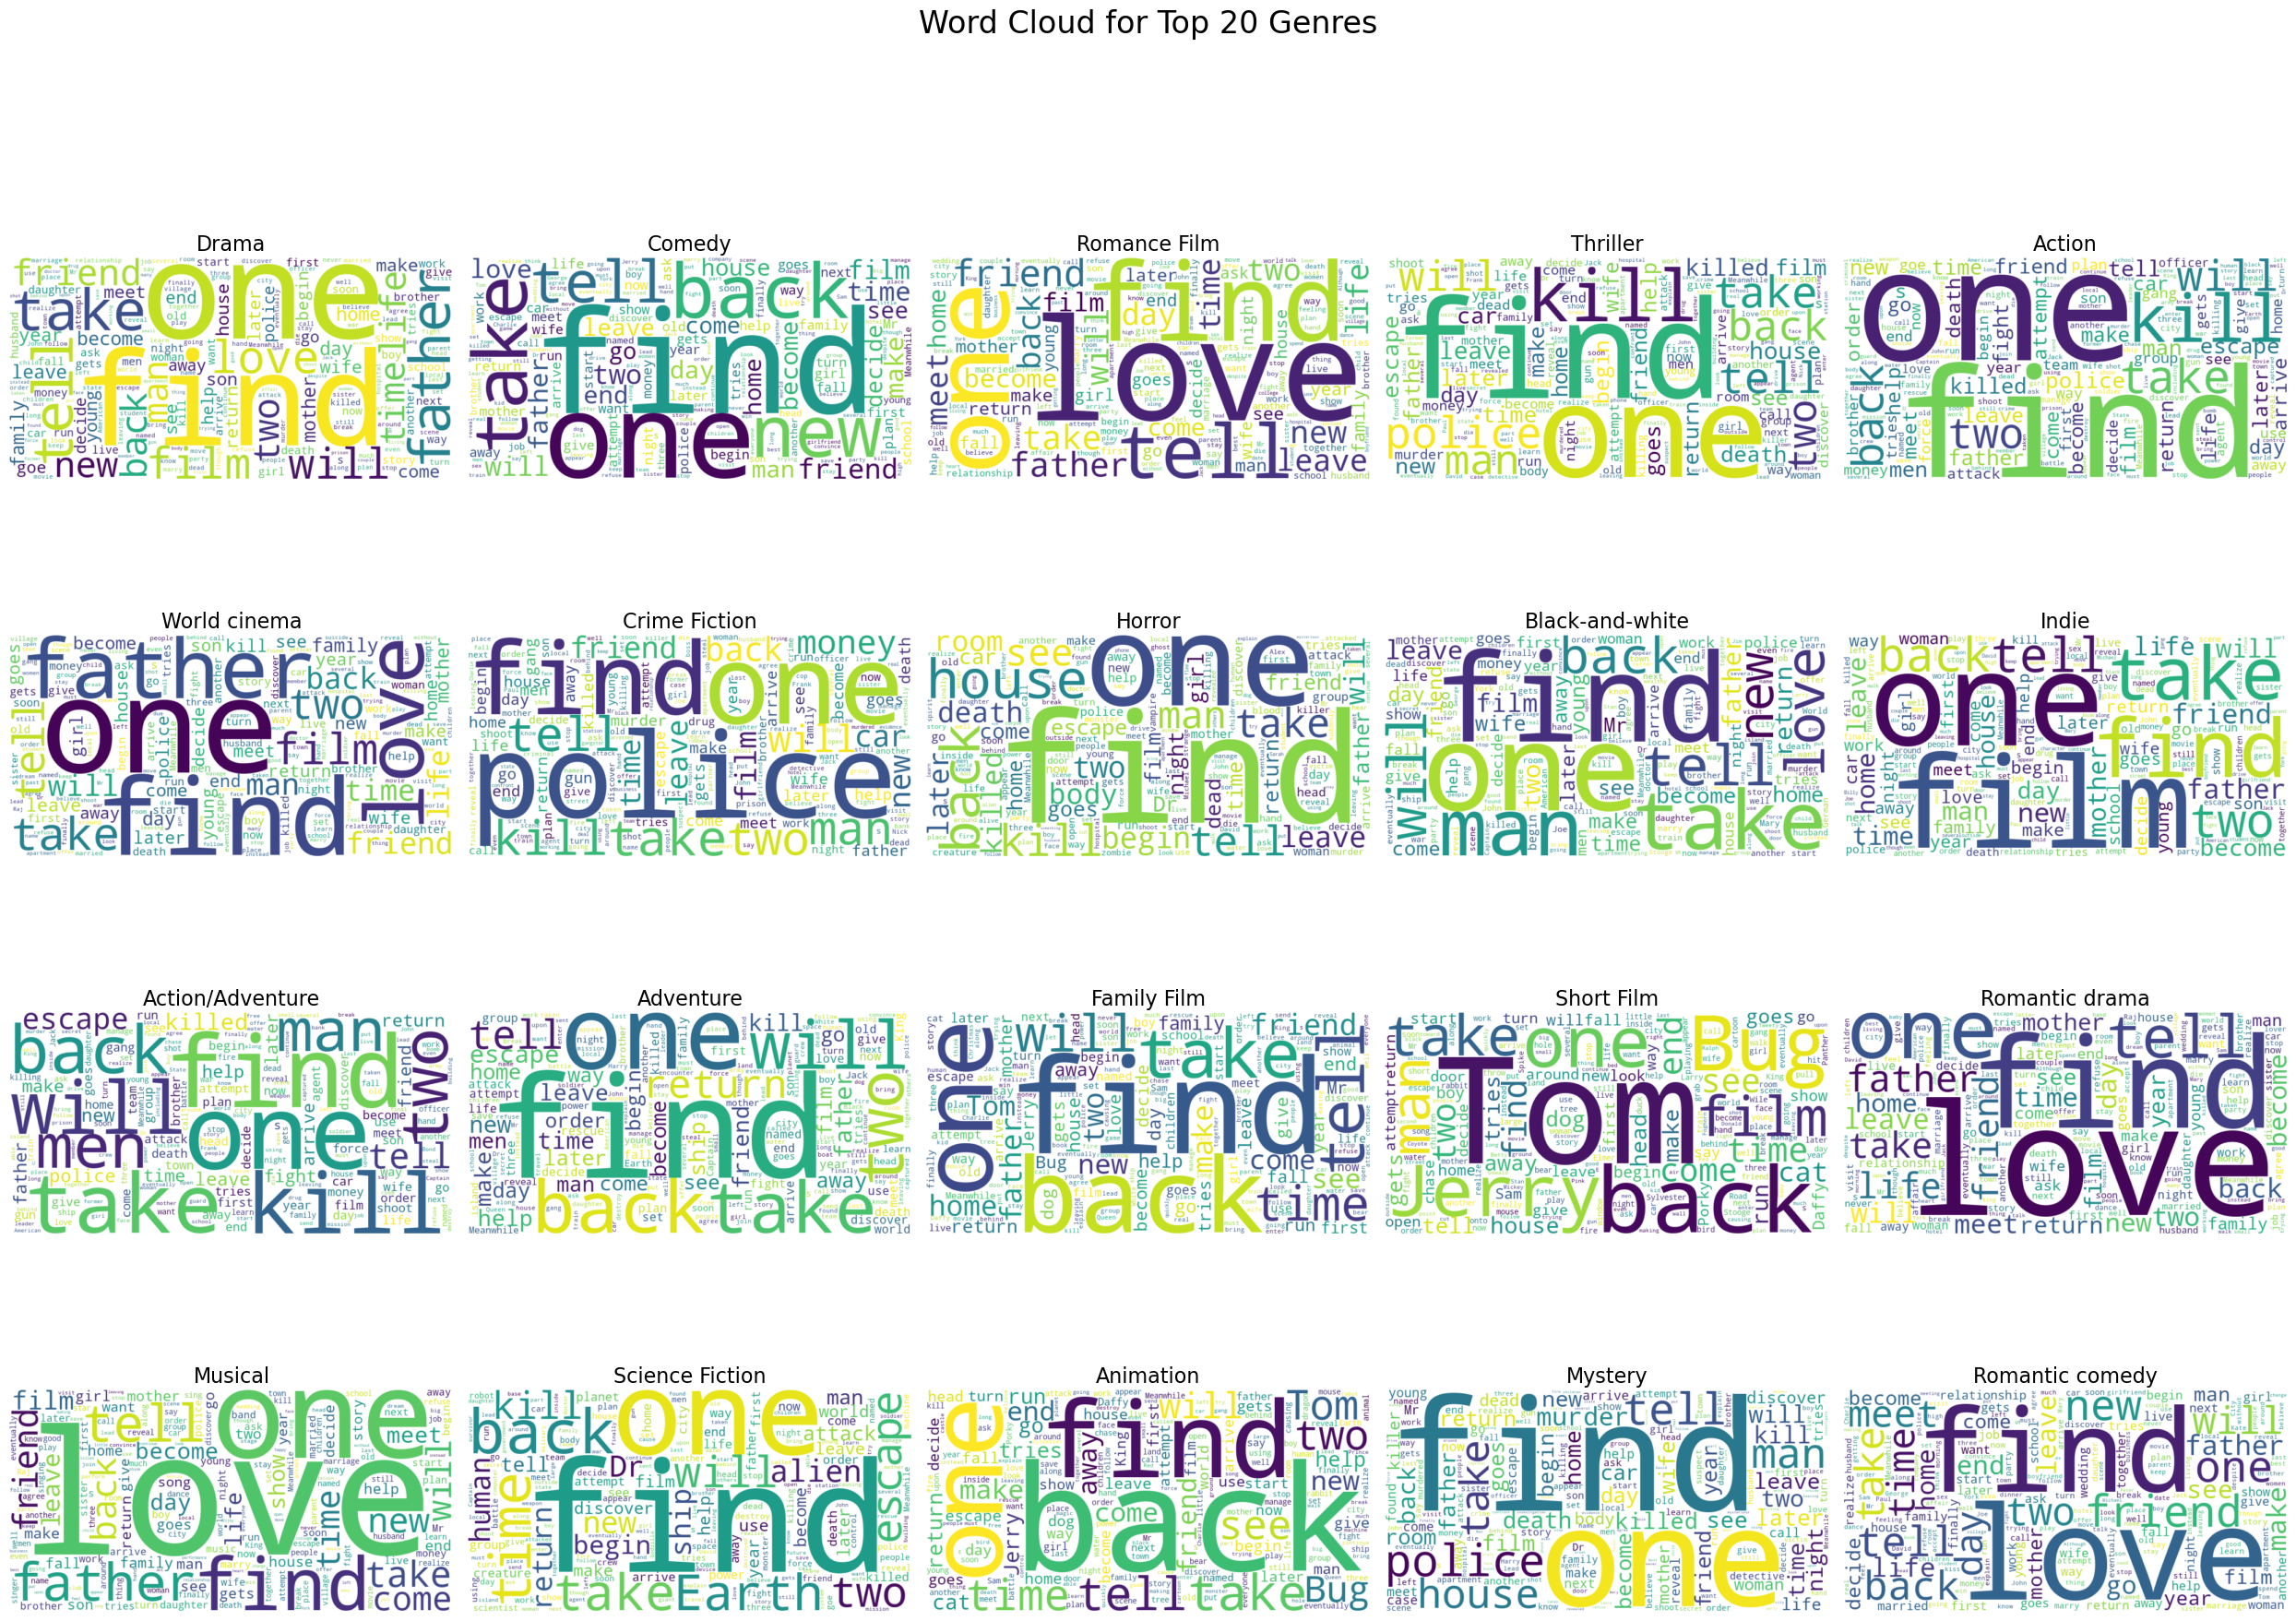

In [ ]:
# Remove 'Movie genres' is NaN
merged_df_genre = merged_df.copy()
merged_df_genre['Movie genres'] = merged_df['Movie genres'].apply(lambda x: x if isinstance(x, list) else [])

top_genre_names = top_genres.index.tolist()

fig, axes = plt.subplots(4, 5, figsize=(25, 20))  # 4 rows, 5 columns 
fig.suptitle('Word Cloud for Top 20 Genres', fontsize=24)
axes = axes.flatten()


for i, genre in enumerate(top_genre_names):
    # Filter summaries that contain the current genre
    genre_summaries = merged_df_genre[merged_df_genre['Movie genres'].apply(lambda genres: genre in genres)]['Plot summary']
    
    # Combine all summaries into one text for the word cloud
    combined_text = ' '.join(genre_summaries)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(combined_text)
    
    # Plot the word cloud 
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(genre, fontsize=16)

# Hide any unused subplots 
for j in range(len(top_genre_names), len(axes)):
    axes[j].axis('off')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()